In [1]:
path = 'archive/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(path)

df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df['daily_return'] = df['close'].pct_change() * 100

df['sma_10'] = df['close'].rolling(window=10).mean()
df['sma_20'] = df['close'].rolling(window=20).mean()
df['ema_10'] = df['close'].ewm(span=10, adjust=False).mean()
df['ema_20'] = df['close'].ewm(span=20, adjust=False).mean()

df['volatility_10'] = df['daily_return'].rolling(window=10).std()
df['volatility_20'] = df['daily_return'].rolling(window=20).std()

delta = df['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))

df['upper_band'] = df['sma_20'] + (df['close'].rolling(window=20).std() * 2)
df['lower_band'] = df['sma_20'] - (df['close'].rolling(window=20).std() * 2)

df['macd'] = df['ema_10'] - df['ema_20']

df['momentum'] = df['close'] - df['close'].shift(4)
df['roc'] = df['close'].pct_change(periods=5) * 100  
df['obv'] = (np.sign(df['close'].diff()) * df['volume']).cumsum()  

df['log_return'] = np.log(df['close'] / df['close'].shift(1))

df.dropna(inplace=True)

df.head()


,date,open,high,low,close,volume,Name,daily_return,sma_10,sma_20,...,volatility_10,volatility_20,rsi,upper_band,lower_band,macd,momentum,roc,obv,log_return
20,2013-03-11,14.85,15.15,14.71,15.13,6961800,AAL,1.407507,14.110,14.0265,...,0.957837,2.733913,61.357702,15.284791,12.768209,0.138025,1.08,8.848921,47831900.0,0.013977
21,2013-03-12,15.14,15.60,14.95,15.50,8999100,AAL,2.445473,14.334,14.0785,...,0.998667,2.731027,83.180428,15.488976,12.668024,0.221672,0.93,10.320285,56831000.0,0.024160
22,2013-03-13,15.54,16.20,15.48,15.91,11380000,AAL,2.645161,14.584,14.1605,...,1.037491,2.744930,84.890110,15.791328,12.529672,0.315253,1.09,9.196980,68211000.0,0.026108
23,2013-03-14,15.98,16.36,15.93,16.25,8383300,AAL,2.137021,14.866,14.2400,...,0.879594,2.723499,85.449735,16.110727,12.369273,0.408505,1.33,9.649123,76594300.0,0.021145
24,2013-03-15,16.45,16.54,15.88,15.98,17667700,AAL,-1.661538,15.103,14.3395,...,1.437579,2.504418,92.285714,16.359937,12.319063,0.447085,0.85,7.104558,58926600.0,-0.016755


In [4]:
from sklearn.preprocessing import StandardScaler

features = ['open', 'high', 'low', 'close', 'volume', 'daily_return', 'sma_10', 'sma_20', 
            'ema_10', 'ema_20', 'volatility_10', 'volatility_20', 'rsi', 'upper_band', 
            'lower_band', 'macd', 'momentum', 'roc', 'obv', 'log_return']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df[features].head()


,open,high,low,close,volume,daily_return,sma_10,sma_20,ema_10,ema_20,volatility_10,volatility_20,rsi,upper_band,lower_band,macd,momentum,roc,obv,log_return
20,-2.257077,-2.261225,-2.242789,-2.233856,-0.348208,0.573416,-2.315740,-2.306484,-2.296555,-2.298129,-1.463840,0.952238,0.409654,-2.326664,-2.250949,-0.030081,0.522920,1.540211,-1.996419,0.579452
21,-2.229727,-2.219183,-2.219888,-2.198918,-0.053570,1.037477,-2.294602,-2.301580,-2.277317,-2.286790,-1.410635,0.947560,1.604515,-2.308553,-2.260890,0.079605,0.441392,1.816813,-1.957914,1.034115
22,-2.192003,-2.163126,-2.169317,-2.160202,0.290760,1.126755,-2.271011,-2.293847,-2.254522,-2.272829,-1.360045,0.970093,1.698125,-2.281734,-2.274619,0.202316,0.528356,1.605642,-1.909223,1.121056
23,-2.150507,-2.148177,-2.126379,-2.128097,-0.142628,0.899572,-2.244400,-2.286350,-2.230021,-2.257128,-1.565796,0.935360,1.728767,-2.253403,-2.290535,0.324596,0.658801,1.690641,-1.873353,0.899486
24,-2.106182,-2.131360,-2.131150,-2.153592,1.200098,-0.798713,-2.222036,-2.276966,-2.214621,-2.245360,-0.838699,0.580279,2.103057,-2.231298,-2.295517,0.375186,0.397911,1.212287,-1.948948,-0.792627


In [5]:
df = df.drop(columns=['Name', 'date'], errors='ignore')

window_size = 20
X = []

for i in range(len(df) - window_size + 1):
    X.append(df[features].iloc[i:i + window_size].values)

X = np.array(X)

X.shape


(1220, 20, 20)

In [6]:
from sklearn.manifold import TSNE

X_flat = X.reshape(X.shape[0], -1) 
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_flat)


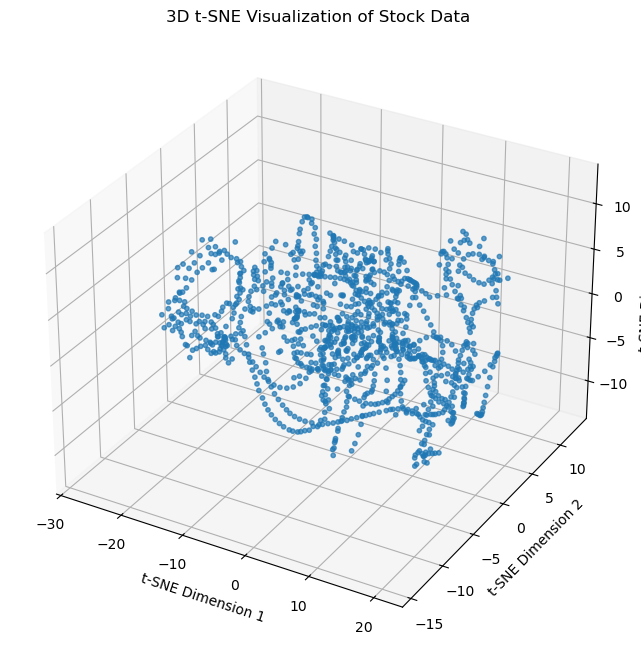

In [7]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3)
X_tsne_3d = tsne.fit_transform(X_flat)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], s=10, alpha=0.7)
ax.set_title("3D t-SNE Visualization of Stock Data")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()



In [8]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=3)
X_isomap = isomap.fit_transform(X_flat)

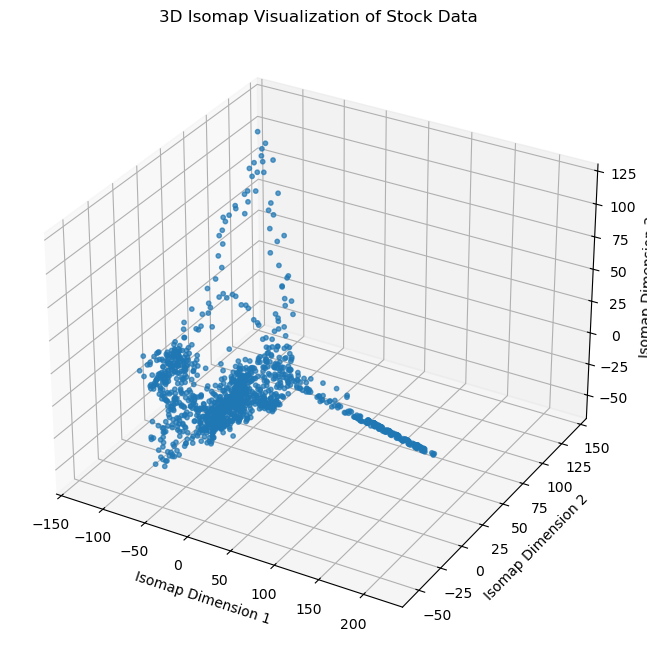

In [9]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply Isomap with 3 components
isomap = Isomap(n_components=3)
X_isomap_3d = isomap.fit_transform(X_flat)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_isomap_3d[:, 0], X_isomap_3d[:, 1], X_isomap_3d[:, 2], s=10, alpha=0.7)
ax.set_title("3D Isomap Visualization of Stock Data")
ax.set_xlabel("Isomap Dimension 1")
ax.set_ylabel("Isomap Dimension 2")
ax.set_zlabel("Isomap Dimension 3")
plt.show()


In [10]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
X_lle = lle.fit_transform(X_flat)

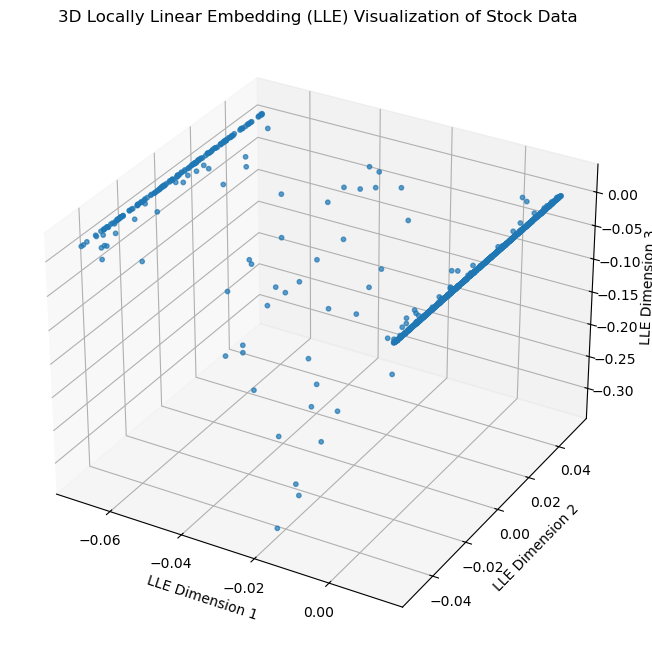

In [11]:
from sklearn.manifold import LocallyLinearEmbedding
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply LLE with 3 components
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
X_lle_3d = lle.fit_transform(X_flat)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lle_3d[:, 0], X_lle_3d[:, 1], X_lle_3d[:, 2], s=10, alpha=0.7)
ax.set_title("3D Locally Linear Embedding (LLE) Visualization of Stock Data")
ax.set_xlabel("LLE Dimension 1")
ax.set_ylabel("LLE Dimension 2")
ax.set_zlabel("LLE Dimension 3")
plt.show()


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Use k-means clustering on the embedding results
kmeans = KMeans(n_clusters=5)  # Choose a suitable number of clusters
labels_tsne = kmeans.fit_predict(X_tsne)
labels_isomap = kmeans.fit_predict(X_isomap)
labels_lle = kmeans.fit_predict(X_lle)

# Calculate Silhouette Score for each
tsne_score = silhouette_score(X_tsne, labels_tsne)
isomap_score = silhouette_score(X_isomap, labels_isomap)
lle_score = silhouette_score(X_lle, labels_lle)

print("Silhouette Scores:")
print("t-SNE:", tsne_score)
print("Isomap:", isomap_score)
print("LLE:", lle_score)


Silhouette Scores:
t-SNE: 0.36561224
Isomap: 0.47038854458403423
LLE: 0.9465311924323504


In [13]:
from sklearn.manifold import trustworthiness

# Calculate Trustworthiness for each method
tsne_trust = trustworthiness(X_flat, X_tsne)
isomap_trust = trustworthiness(X_flat, X_isomap)
lle_trust = trustworthiness(X_flat, X_lle)

print("Trustworthiness:")
print("t-SNE:", tsne_trust)
print("Isomap:", isomap_trust)
print("LLE:", lle_trust)


Trustworthiness:
t-SNE: 0.989859871233025
Isomap: 0.904076583887897
LLE: 0.7866014716225721


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


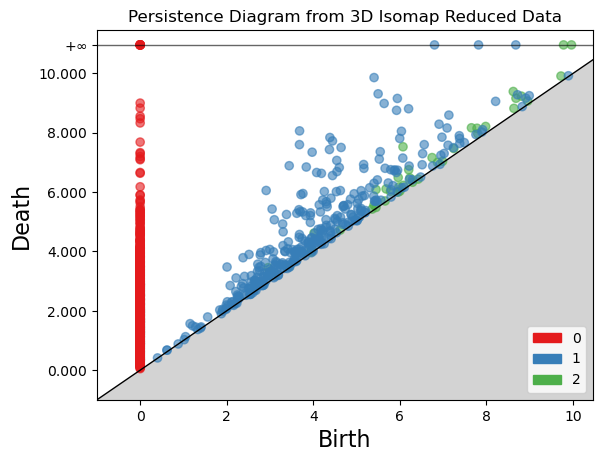

Betti Numbers: β₀ = 7, β₁ = 3, β₂ = 2


In [14]:
import numpy as np
import gudhi
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt


isomap = Isomap(n_neighbors=15, n_components=3)  # Adjust the number of neighbors as necessary
X_isomap_3d = isomap.fit_transform(X_flat)

max_edge_length = 10  # Adjust this value to connect more points
rips_complex = gudhi.RipsComplex(points=X_isomap_3d, max_edge_length=max_edge_length)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)  # Check for higher dimensions

persistence_diagram = simplex_tree.persistence()

gudhi.plot_persistence_diagram(persistence_diagram)
plt.title("Persistence Diagram from 3D Isomap Reduced Data")
plt.show()

betti_numbers = simplex_tree.betti_numbers()
print(f'Betti Numbers: β₀ = {betti_numbers[0]}, β₁ = {betti_numbers[1]}, β₂ = {betti_numbers[2]}')




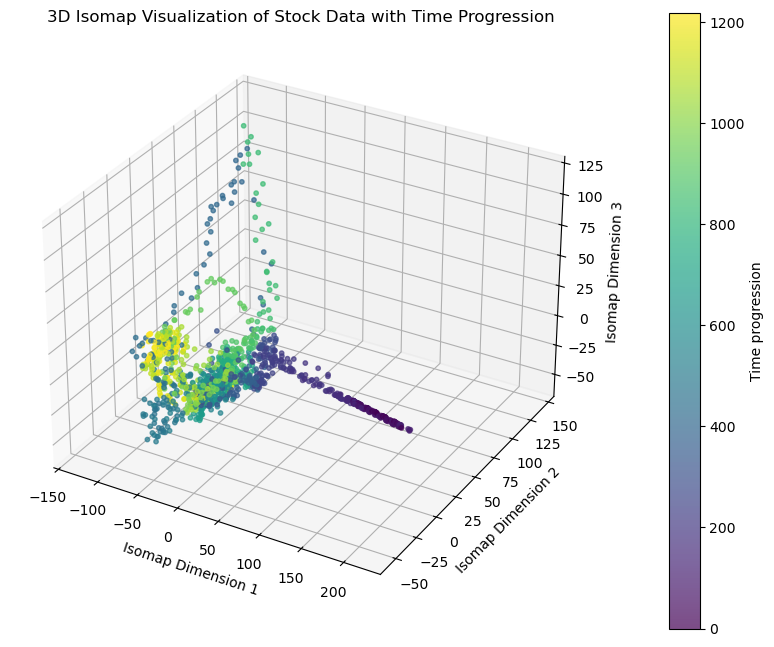

In [16]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Apply Isomap with 3 components
isomap = Isomap(n_components=3)
X_isomap_3d = isomap.fit_transform(X_flat)

# Create a time-based color gradient
time = np.arange(X_isomap_3d.shape[0])  # Assuming each row represents a time step
colors = plt.cm.viridis(time / time.max())  # Normalize time to [0, 1] and map to 'viridis' color

# Create a 3D scatter plot with color gradient
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_isomap_3d[:, 0], X_isomap_3d[:, 1], X_isomap_3d[:, 2], c=time, cmap='viridis', s=10, alpha=0.7)

# Add color bar to indicate time progression
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Time progression")

# Set plot labels and title
ax.set_title("3D Isomap Visualization of Stock Data with Time Progression")
ax.set_xlabel("Isomap Dimension 1")
ax.set_ylabel("Isomap Dimension 2")
ax.set_zlabel("Isomap Dimension 3")
plt.show()
